In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
figure_folder = 'figures/'

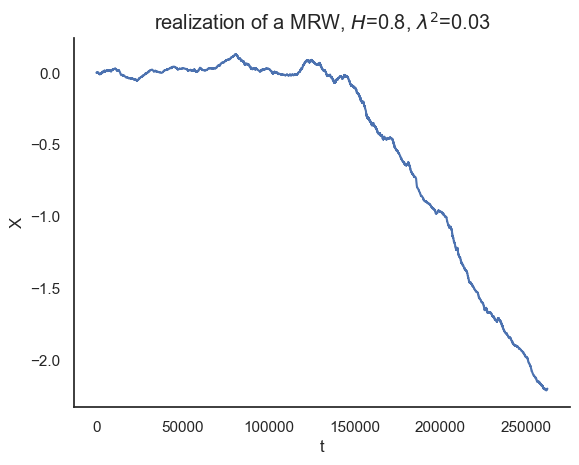

In [5]:
from pymultifracs.simul import mrw
import numpy as np

X = mrw(shape=2**18, H=0.8, lam=np.sqrt(0.03), L=2**18)

plt.plot(X)
plt.title(r'realization of a MRW, $H$=0.8, $\lambda^2$=0.03', size='large')
plt.ylabel('X')
plt.xlabel('t')
sns.despine()
plt.show()

In [54]:
from pymultifracs import wavelet_analysis, mfa

In [56]:
WT = wavelet_analysis(np.c_[X, X])

In [ ]:
scaling_ranges = [(3, 12)]

In [76]:
leader = WT.get_leaders(2)

In [79]:
leader._check_regularity(scaling_ranges, 'bootstrap', None)

In [78]:
lwt = mfa(leader, scaling_ranges, n_cumul=3, estimates='sc', weighted='bootstrap', R=100)

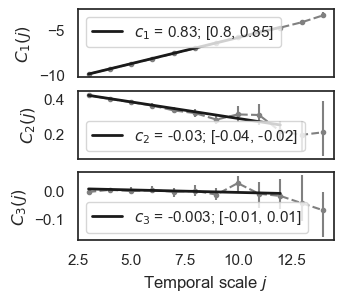

In [80]:
lwt.cumulants.plot()

In [81]:
_ = WT.bootstrap(100, 3)

In [82]:
dwt = mfa(WT, scaling_ranges, n_cumul=3, q=None, estimates='s')

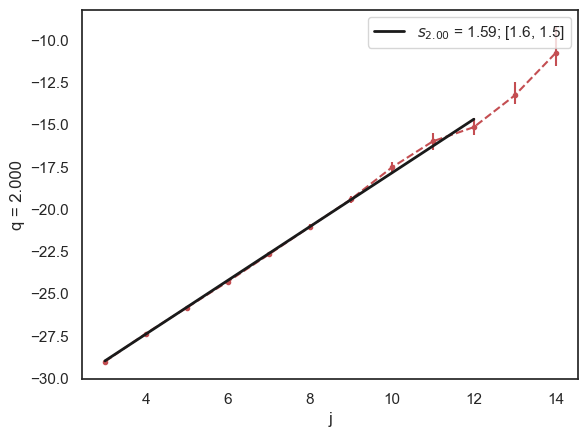

In [83]:
dwt.structure.plot()

In [188]:
out = lwt.cumulants.bootstrapped_mrq.values[
    lwt.cumulants.bootstrapped_mrq.m == 1][0]

In [196]:
out.reshape(out.shape[0], lwt.cumulants.bootstrapped_mrq.n_sig, -1)

array([[[-11.00915431, -11.01807911, -11.01327628, -11.00999299,
         -11.00941835]],

       [[-10.43555379, -10.4477402 , -10.44377471, -10.43519931,
         -10.43701785]],

       [[ -9.88631646,  -9.9002147 ,  -9.89611985,  -9.88973557,
          -9.888181  ]],

       [[ -9.32532937,  -9.33602872,  -9.33495626,  -9.33025251,
          -9.3353311 ]],

       [[ -8.76498973,  -8.76376331,  -8.77038338,  -8.75931894,
          -8.76604203]],

       [[ -8.18012021,  -8.19204033,  -8.18942715,  -8.18706268,
          -8.19097823]],

       [[ -7.63053383,  -7.63747568,  -7.62180592,  -7.60302869,
          -7.6169804 ]],

       [[ -7.02406554,  -7.00536055,  -7.05133346,  -7.02565969,
          -7.02986797]],

       [[ -6.45529587,  -6.46448565,  -6.47184377,  -6.45547325,
          -6.45560645]],

       [[ -5.95309108,  -5.89317968,  -5.94177404,  -5.87031429,
          -5.87970015]],

       [[ -5.36657356,  -5.34856591,  -5.41809038,  -5.35885813,
          -5.37727617]],


In [184]:
out.shape

(12, 5)

In [169]:
out.reshape(out.shape[0], lwt.cumulants.bootstrapped_mrq.n_sig, -1)

(2, 1, 60)

In [220]:
lwt.cumulants.bootstrapped_mrq.values.shape

(2, 12, 5)

In [146]:
lwt.cumulants.CI_C2

ValueError: cannot select an axis to squeeze out which has size not equal to one

In [37]:
dwt.structure.bootstrapped_mrq.n_rep

200

In [259]:
lwt.cumulants.bootstrapped_mrq.CI_C2

array([[0.31002617, 0.32171424],
       [0.29010381, 0.3044415 ],
       [0.26550483, 0.28065204],
       [0.24535346, 0.26244538],
       [0.21180265, 0.2364089 ],
       [0.18729983, 0.21926339],
       [0.15241689, 0.20140989],
       [0.14279832, 0.1961378 ],
       [0.15192837, 0.23060064],
       [0.21657489, 0.36274522],
       [0.10153733, 0.23169788],
       [0.0266347 , 0.19450504]])

In [253]:
lwt.cumulants.CI_c2.shape

(1, 2)

In [254]:
lwt.cumulants.CI_C2.shape

(12, 2)

In [125]:
lwt.cumulants.c2.shape

TypeError: 'NoneType' object cannot be interpreted as an integer

In [49]:
dwt1, lwt1 = mf_analysis([WT.wt_coefs, WT.wt_leaders], [(3, 12)], weighted=True, n_cumul=3, q=None)

In [42]:
from typing import Tuple
def estimate_confidence_interval_from_bootstrap(
        bootstrap_estimates: np.ndarray,
        confidence_level: float = 95.0) \
        -> Tuple[float, float]:
    """
    This function estimates a confidence interval of an estimator given a
    variety of estimates of the same statistic from resampled data.
    Args:
        bootstrap_estimates: a NumPy array of dimension (B, ) containing the statistic
                    computed from resampled data
        confidence_level: the confidence level associated with the confidence
                          interval in percent (i.e. between 0 and 100)
    """

    percent = 100.0 - confidence_level
    bootstrap_confidence_interval \
        = (np.percentile(bootstrap_estimates, percent / 2.0, axis=-1),
           np.percentile(bootstrap_estimates, 100.0 - percent / 2.0, axis=-1))

    return bootstrap_confidence_interval

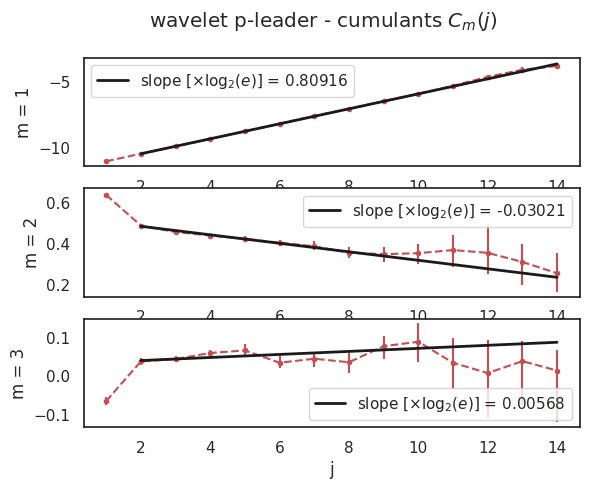

In [43]:
lwt1.cumulants.plot(cm_boot=lwt.cumulants)

In [68]:
import pandas as pd

In [76]:
df1 = pd.DataFrame(lwt1.cumulants.C2, lwt1.cumulants.j, ['est'])

In [77]:
df = pd.DataFrame(CI, lwt.cumulants.j, ['CI_lo', 'CI_hi'])

In [78]:
df.join(df1)

,CI_lo,CI_hi,est
2,0.409823,0.443453,0.427682
3,0.375947,0.409872,0.393274
4,0.341777,0.383074,0.364597
5,0.345677,0.389646,0.373013
6,0.327895,0.384836,0.358738
7,0.339635,0.413199,0.375578
8,0.281940,0.381566,0.329378
9,0.253409,0.364893,0.301224
10,0.204546,0.369407,0.280157
11,0.113603,0.346363,0.191650
